In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, sys.path[0].replace('tests', 'src'))
from kNN import KNearestNeighborsClassifier

In [2]:
data_points = [['Shortbread',     0.14,       0.14,      0.28,     0.44],
        ['Shortbread',     0.10,       0.18,      0.28,     0.44],
        ['Shortbread',     0.12,       0.10,      0.33,     0.45],
        ['Shortbread',     0.10,       0.25,      0.25,     0.40],
        ['Sugar',     0.00,       0.10,      0.40,     0.50],
        ['Sugar',     0.00,       0.20,      0.40,     0.40],
        ['Sugar',     0.02,       0.08,      0.45,     0.45],
        ['Sugar',     0.10,       0.15,      0.35,     0.40],
        ['Sugar',     0.10,       0.08,      0.35,     0.47],
        ['Sugar',     0.00,       0.05,      0.30,     0.65],
        ['Fortune',     0.20,       0.00,      0.40,     0.40],
        ['Fortune',     0.25,       0.10,      0.30,     0.35],
        ['Fortune',     0.22,       0.15,      0.50,     0.13],
        ['Fortune',     0.15,       0.20,      0.35,     0.30],
        ['Fortune',     0.22,       0.00,      0.40,     0.38],
        ['Shortbread',     0.05,       0.12,      0.28,     0.55],
        ['Shortbread',     0.14,       0.27,      0.31,     0.28],
        ['Shortbread',     0.15,       0.23,      0.30,     0.32],
        ['Shortbread',     0.20,       0.10,      0.30,     0.40]]

classification = [rows[0] for rows in data_points]

data_values = [rows[1:] for rows in data_points]





In [4]:

k_error_dict ={ i: 0 for i in range(1,19)}

for k_value in range(1,19):
    
    kNN = KNearestNeighborsClassifier(k=k_value)

    for i in range(len(data_values)):

        current_point_data = data_values[i]
        current_point_classification = classification[i]
        
        data_values.pop(i)
        classification.pop(i)

        kNN.fit(data_values, classification)
        classified = kNN.classify(current_point_data)
    
        if current_point_classification != classified:
            k_error_dict[k_value] += 1

        data_values.insert(i, current_point_data)
        classification.insert(i, current_point_classification)


k_values = [key for key in k_error_dict]
number_correct = [k_error_dict[key] for key in k_error_dict]
percentage_correct = [ num_correct / 19 for num_correct in number_correct]


[8, 8, 8, 8, 6, 6, 8, 10, 10, 10, 10, 10, 9, 10, 11, 11, 11, 11]
[0.42105263157894735, 0.42105263157894735, 0.42105263157894735, 0.42105263157894735, 0.3157894736842105, 0.3157894736842105, 0.42105263157894735, 0.5263157894736842, 0.5263157894736842, 0.5263157894736842, 0.5263157894736842, 0.5263157894736842, 0.47368421052631576, 0.5263157894736842, 0.5789473684210527, 0.5789473684210527, 0.5789473684210527, 0.5789473684210527]


<AxesSubplot:xlabel='k_values', ylabel='percentage_correct'>

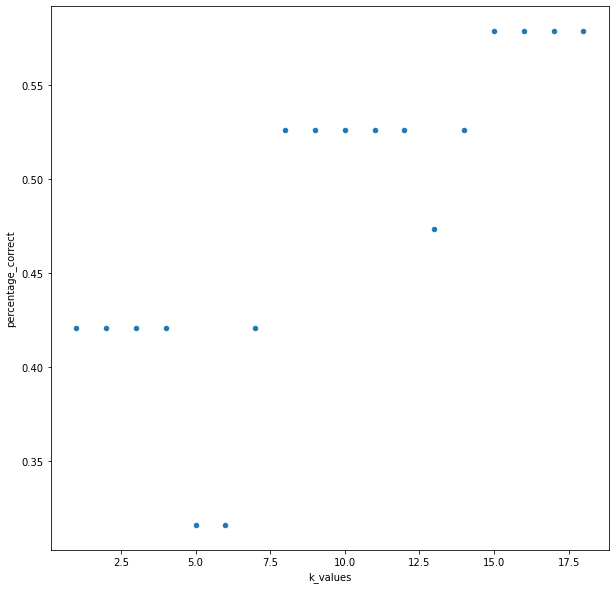

In [5]:
k_error_df = pd.DataFrame({'k_values': k_values, 'percentage_correct': percentage_correct})
k_error_df.plot(x =  'k_values', y = 'percentage_correct', kind='scatter', figsize = (10,10))